### Section: Using SOTA model for image classification

In [16]:
from keras.applications.efficientnet_v2 import EfficientNetV2S, decode_predictions
model = EfficientNetV2S(weights='imagenet')

In [17]:
from tensorflow.keras.preprocessing import image
import numpy as np

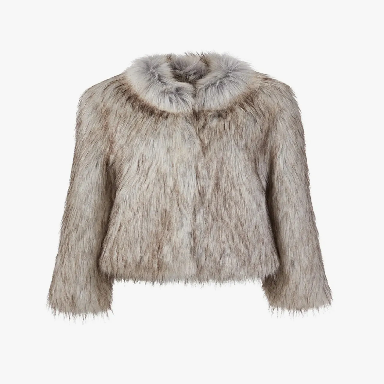

In [18]:
img = image.load_img("Furcoat.webp",target_size=(384, 384))
img

In [19]:
img_array = image.img_to_array(img)
img_array = img_array.reshape((1, 384, 384, 3))

In [20]:
myresult = model.predict(img_array)
decode_predictions(myresult)

1/1 [==============================] - 3s 3s/step


[[('n03404251', 'fur_coat', 0.9117288),
  ('n03045698', 'cloak', 0.0023751701),
  ('n04325704', 'stole', 0.0013715128),
  ('n02817516', 'bearskin', 0.0010477909),
  ('n04479046', 'trench_coat', 0.00076673366)]]

### Section: Fine tuning approaches

In [21]:
from keras.applications.efficientnet import EfficientNetB5
model_base = EfficientNetB5(weights='imagenet',
                          include_top=False,
                          pooling='avg')

115263384/115263384 [==============================] - 6s 0us/step


In [22]:
model_base.trainable = False

In [23]:
model_base.trainable = True
for layer in model_base.layers[:-5]:
  layer.trainable = False

### Section: Fine tune SOTA EfficientNet image model

In [ ]:
!unzip "rural_urban.zip"

In [25]:
import keras
from keras.utils import image_dataset_from_directory as load_images

In [26]:
train_ds = load_images(
  "train",
  seed=42,
  image_size=(224, 224),
  label_mode='categorical',
  batch_size=12)

Found 72 files belonging to 2 classes.


In [27]:
val_ds = load_images(
  "val",
  seed=42,
  image_size=(224, 224),
  label_mode='categorical',
  batch_size=20)

Found 20 files belonging to 2 classes.


In [28]:
from keras.applications.efficientnet import EfficientNetB5, decode_predictions

In [29]:
model_base = EfficientNetB5(weights='imagenet',
                          include_top=False,
                          pooling='avg',
                          input_shape=(224,224,3))
model_base.trainable = True

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [31]:
model_upd = Sequential()
model_upd.add(model_base)
model_upd.add(Dense(32,activation='relu'))
model_upd.add(Dense(2,activation='softmax'))

In [32]:
model_upd.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb5 (Functional  (None, 2048)              28513527  
 )                                                               
                                                                 
 dense (Dense)               (None, 32)                65568     
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                                 
Total params: 28579161 (109.02 MB)
Trainable params: 28406418 (108.36 MB)
Non-trainable params: 172743 (674.78 KB)
_________________________________________________________________


In [33]:
optimizer = keras.optimizers.Adam(learning_rate=3e-5)
model_upd.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

In [34]:
history = model_upd.fit(train_ds,
                        epochs=15,
                        validation_data=val_ds,
                        validation_steps=1,
                        verbose=1)

Epoch 1/15
6/6 [==============================] - 101s 1s/step - loss: 0.6958 - accuracy: 0.5556 - val_loss: 0.6456 - val_accuracy: 0.5500
Epoch 2/15
6/6 [==============================] - 2s 388ms/step - loss: 0.5697 - accuracy: 0.7083 - val_loss: 0.6100 - val_accuracy: 0.6000
Epoch 3/15
6/6 [==============================] - 3s 425ms/step - loss: 0.4926 - accuracy: 0.8056 - val_loss: 0.5815 - val_accuracy: 0.6000
Epoch 4/15
6/6 [==============================] - 2s 388ms/step - loss: 0.4203 - accuracy: 0.8889 - val_loss: 0.5551 - val_accuracy: 0.6500
Epoch 5/15
6/6 [==============================] - 2s 386ms/step - loss: 0.3586 - accuracy: 0.9583 - val_loss: 0.5294 - val_accuracy: 0.7500
Epoch 6/15
6/6 [==============================] - 3s 433ms/step - loss: 0.2924 - accuracy: 0.9861 - val_loss: 0.5058 - val_accuracy: 0.7500
Epoch 7/15
6/6 [==============================] - 3s 409ms/step - loss: 0.2506 - accuracy: 1.0000 - val_loss: 0.4835 - val_accuracy: 0.7500
Epoch 8/15
6/6 [=====

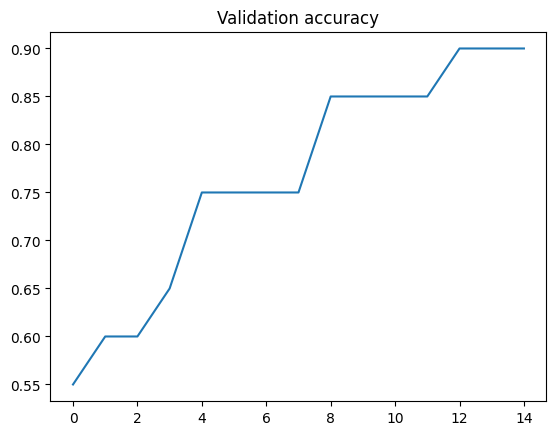

In [35]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.title("Validation accuracy")
plt.show()

### Section: Transfer learning for text

In [36]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 63.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 105.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 85.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 34.2 MB/s eta 0:00:00


In [37]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.7 MB/s eta 0:00:00


### Using a pipeline

In [38]:
from transformers import pipeline

In [39]:
classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [40]:
res = classifier("No good acting or great story in this movie.")
res

[{'label': 'NEGATIVE', 'score': 0.9997885823249817}]

### Exercise 11, RoBERTa for tweet sentiment classification

In [42]:
from transformers import pipeline
classifier = pipeline("sentiment-analysis",
                      "cardiffnlp/twitter-roberta-base-sentiment")

In [43]:
input_tweets = ['Love the mountains! :D #blessed',
                'Super supper wid besties xoxo #livingitup',
                'Dis is it. Njoy it to the fullest #YOLO :D'
                ]

In [44]:
res = classifier(input_tweets)
res

[{'label': 'LABEL_2', 'score': 0.988944411277771},
 {'label': 'LABEL_2', 'score': 0.9282486438751221},
 {'label': 'LABEL_2', 'score': 0.9688596725463867}]

### Section: Text Generation

In [45]:
generator = pipeline("text-generation")

No model was supplied, defaulted to gpt2 and revision 6c0e608 (https://huggingface.co/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [46]:
res = generator("A father's love for his daughter",
                max_length=30,
                num_return_sequences=3)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [47]:
res

[{'generated_text': "A father's love for his daughter, who has leukemia, and his decision to share his personal story to bring the story back home, are central to"},
 {'generated_text': "A father's love for his daughter is being challenged by a male neighbor who claims he loves his daughter more than the man he knows.\n\nAfter"},
 {'generated_text': "A father's love for his daughter's birthright has made it difficult – and for many – as he has struggled to navigate the difficult transition. A"}]

### Section: Zero shot classification

In [48]:
classifier = pipeline("zero-shot-classification")

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [49]:
inp_corpus = ["The family will meet at my uncles place'",
              "A CEO must be organised.",
              "My niece is super annoying."]
labels = ["business","politics","family"]

In [50]:
res = classifier(inp_corpus,
                 candidate_labels = labels)
res

[{'sequence': "The family will meet at my uncles place'",
  'labels': ['family', 'business', 'politics'],
  'scores': [0.9936457276344299,
   0.0033247279934585094,
   0.0030294894240796566]},
 {'sequence': 'A CEO must be organised.',
  'labels': ['business', 'politics', 'family'],
  'scores': [0.9443103671073914, 0.03410575911402702, 0.021583881229162216]},
 {'sequence': 'My niece is super annoying.',
  'labels': ['family', 'business', 'politics'],
  'scores': [0.995790421962738, 0.0021097518038004637, 0.0020998551044613123]}]

### Section: Translation

In [51]:
en_to_fr = pipeline("translation_en_to_fr")

No model was supplied, defaulted to t5-base and revision 686f1db (https://huggingface.co/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


/usr/local/lib/python3.10/dist-packages/transformers/models/t5/tokenization_t5_fast.py:158: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


In [52]:
text_en = "Aiza is moving to London"
text_fr = en_to_fr(text_en)
text_fr

[{'translation_text': 'Aiza déménage à Londres'}]

### Section: Fine tuning a SOTA NLP model

In [54]:
from transformers import AutoTokenizer

In [55]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

In [56]:
from transformers import TFAutoModelForSequenceClassification as TFA
model = TFA.from_pretrained("bert-base-cased")

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### Exercise: Fine tuning a BERT model

In [57]:
from datasets import load_dataset
dataset = load_dataset("glue", "cola")

Generating train split:   0%|          | 0/8551 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1043 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1063 [00:00<?, ? examples/s]

In [58]:
train_ds = dataset["train"]
train_ds

Dataset({
    features: ['sentence', 'label', 'idx'],
    num_rows: 8551
})

In [59]:
train_ds['sentence'][40:45], train_ds['label'][40:45]

(['They caused him to become angry by making him.',
  'They caused him to become president by making him.',
  'They made him to exhaustion.',
  'They made him into a monster.',
  'The trolley rumbled through the tunnel.'],
 [0, 0, 0, 1, 1])

In [60]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

In [61]:
train_tokens = tokenizer(train_ds["sentence"], \
                           return_tensors="np", \
                           padding=True)
train_tokens = dict(train_tokens)

In [62]:
import numpy as np
labels = np.array(train_ds["label"])

In [63]:
from transformers import TFAutoModelForSequenceClassification as TFA
model = TFA.from_pretrained("bert-base-cased")

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [64]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(3e-5))

In [ ]:
history = model.fit(train_tokens, labels, \
                    epochs=3, \
                    validation_split=0.2, \
                    verbose=2)

Epoch 1/3
